In [2]:
import os

path = 'data/MnM-2'
os.listdir(path)

['training', 'validation']

In [7]:
patients = os.listdir(f'{path}/training')
len(patients)

160

In [8]:
os.listdir(f'{path}/training/{patients[0]}')

['001_LA_CINE.nii.gz',
 '001_LA_ED.nii.gz',
 '001_LA_ED_gt.nii.gz',
 '001_LA_ES.nii.gz',
 '001_LA_ES_gt.nii.gz',
 '001_SA_CINE.nii.gz',
 '001_SA_ED.nii.gz',
 '001_SA_ED_gt.nii.gz',
 '001_SA_ES.nii.gz',
 '001_SA_ES_gt.nii.gz']

In [124]:
import nibabel as nib
import random

ix = random.randint(0, len(patients))
sample = patients[ix]
sample_path = f'{path}/training/{sample}/{sample}_SA_ED.nii.gz'
img = nib.load(sample_path).get_fdata()
img.shape, img.dtype, img.max(), img.min()

((196, 240, 13), dtype('<f8'), 987.0, 0.0)

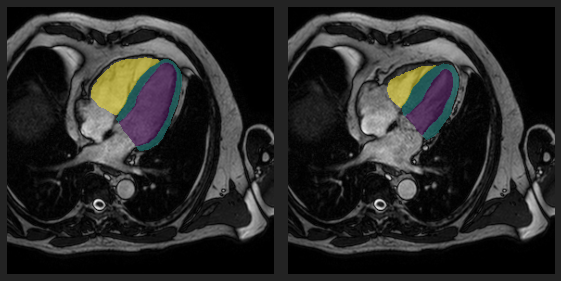

In [120]:
import matplotlib.pyplot as plt

ix = random.randint(0, len(patients))
sample = patients[ix]

modes = ['LA_ED', 'LA_ES']
fig = plt.figure()
for i, mode in enumerate(modes):
    base_path = f'{path}/training/{sample}/{sample}_{mode}'
    sample_path = f'{base_path}.nii.gz'
    mask_path = f'{base_path}_gt.nii.gz'

    img = nib.load(sample_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()

    ax = plt.subplot(1, 2, i+1)
    ax.imshow(img[...,0], cmap='gray')
    mask[mask == 0] = np.nan
    ax.imshow(mask[...,0], alpha=0.5)
    ax.axis('off')

plt.tight_layout()
plt.show()

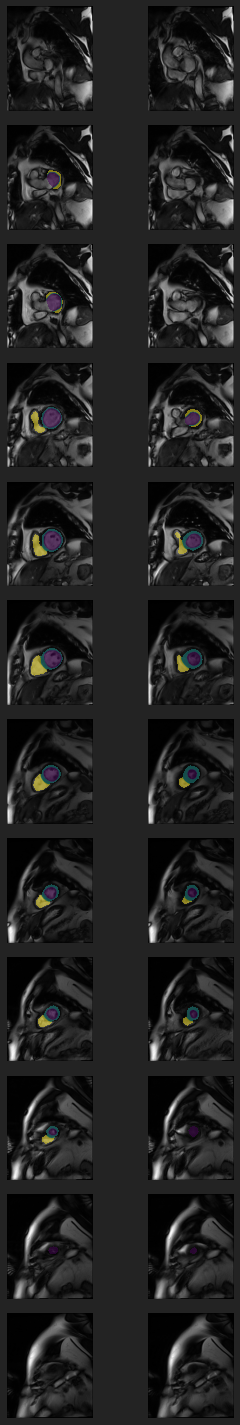

In [148]:
ix = random.randint(0, len(patients))
sample = patients[ix]

modes = ['SA_ED', 'SA_ES']
fig = plt.figure(figsize=(5,20))
for i, mode in enumerate(modes):
    base_path = f'{path}/training/{sample}/{sample}_{mode}'
    sample_path = f'{base_path}.nii.gz'
    mask_path = f'{base_path}_gt.nii.gz'
    img = nib.load(sample_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()
    mask[mask == 0] = np.nan
    channels = img.shape[-1]
    for c in range(channels):
        ax = plt.subplot(channels, 2, i + 1 + 2*c)
        ax.imshow(img[...,c], cmap='gray')
        ax.imshow(mask[...,c], alpha=0.5)
        ax.axis('off')
plt.tight_layout()
plt.show()

In [152]:
from tqdm import tqdm

data = {
    'patient': [],
    'image': [],
    'channel': []
}
modes = ['LA_ED', 'LA_ES', 'SA_ED', 'SA_ES']
for patient in tqdm(sorted(patients)):
    for f in modes:
        image_path = f'{path}/training/{patient}/{patient}_{f}.nii.gz'
        img = nib.load(image_path)
        channels = img.shape[-1]
        for channel in range(channels):
            data['patient'] += [patient]
            data['image'] += [f]
            data['channel'] += [channel]

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:02<00:00, 60.35it/s]


In [167]:
import pandas as pd 

df = pd.DataFrame(data)
df

,patient,image,channel
0,001,LA_ED,0
1,001,LA_ES,0
2,001,SA_ED,0
3,001,SA_ED,1
4,001,SA_ED,2
...,...,...,...
3869,160,SA_ES,2
3870,160,SA_ES,3
3871,160,SA_ES,4
3872,160,SA_ES,5


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3874 entries, 0 to 3873
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   patient  3874 non-null   object
 1   image    3874 non-null   object
 2   channel  3874 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 90.9+ KB


In [166]:
df.to_csv('training_data.csv', index=False)